## **TUMOR DETECTION USING DEEP LEARNING**
(CNN- CONVOLUTIONAL NEURAL NETWORK)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing libraries:

In [ ]:
import pandas as pd
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import models, layers  #sequencial model, layer-maxpooling,dense,flattend,conv2D
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,Dropout

# Data loading:

In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/tumor/BrainTumor',
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)
len(dataset)

Found 3107 files belonging to 4 classes.


98

## Data Pre-processing:

In [ ]:
class_name=dataset.class_names
class_name

['glioma', 'meningioma', 'notumor', 'pituitary']

In [ ]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.shape)

(32, 256, 256, 3)
(32,)


In [ ]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[3 2 0 3 0 0 2 3 0 1 3 3 2 3 0 0 3 0 1 0 3 3 3 2 1 0 1 0 0 1 1 3]


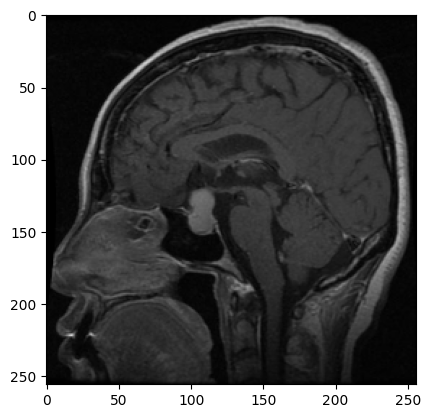

In [ ]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

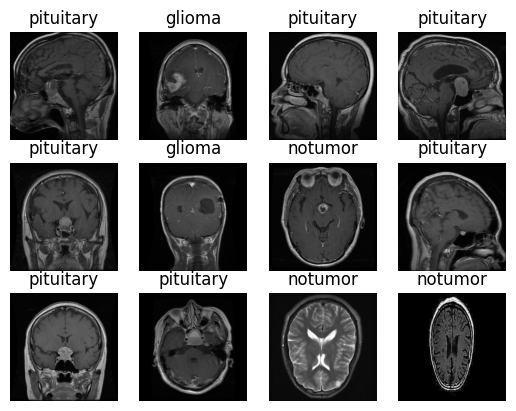

In [ ]:
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")

## Data Spliting into Training, Testing & Validation:

train_size=0.8,
test_size=0.1,
val_size=0.1

In [ ]:
train_size=0.8
len(dataset)*train_size

78.4

In [ ]:
train_ds=dataset.take(78)
len(train_ds)

78

In [ ]:
test_ds=dataset.skip(78)
len(test_ds)

20

In [ ]:
val_size = 0.1
len(dataset)*val_size

9.8

In [ ]:
val_ds = test_ds.take(9)
len(val_ds)

9

In [ ]:
test_ds = test_ds.skip(9)
len(test_ds)

11

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):

    ds_size=len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)

    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)

    train_ds=ds.take(train_size)

    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [ ]:
len(val_ds)

9

In [ ]:
len(train_ds)

78

In [ ]:
len(test_ds)

11

In [ ]:
#cache() is used to keep image in the memory:
#prefetch() is used when read cpu and train gpu
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

## Data Filteration:

filters : rescaling, resizing and augmentation

In [ ]:
#RESIZE & RESCALE:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])
resize_and_rescale

In [ ]:
#DATA AUGMENTATION:taking image we apply tarining by  rotation, zoom, contrast & horizontal
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])
data_augmentation

## Model Fitting:

####CONVOLUTIONAL NEURAL NETWORK MODEL:
cnn has two part : convolutional layer & dense layer,  

1st layer : resize & rescale & 2nd layer: data_aug

CNN Model: 32 layers, 64 neurons, relu is fast to compute,

filtersize / kernel_size=(2,2) (3,3), softmax=normalize probability of classes





In [ ]:
#CNN Model:
input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=4

model= models.Sequential([
    resize_and_rescale,
    data_augmentation,
#convolutional layer:
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape),
#pooling layer: maxpooling
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax")
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
#compiler: loss=function
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [ ]:
#model fitting:training_ds_accuracy is major

EPOCHS=200
history= model.fit(
     train_ds,
     epochs=EPOCHS,
     batch_size=BATCH_SIZE,
     verbose=1,
     validation_data=val_ds
)

Epoch 1/200
78/78 [==============================] - 17s 211ms/step - loss: 1.2060 - accuracy: 0.4686 - val_loss: 1.0932 - val_accuracy: 0.5556
Epoch 2/200
78/78 [==============================] - 5s 62ms/step - loss: 0.9942 - accuracy: 0.5942 - val_loss: 1.1244 - val_accuracy: 0.5972
Epoch 3/200
78/78 [==============================] - 5s 62ms/step - loss: 0.9244 - accuracy: 0.6372 - val_loss: 0.9219 - val_accuracy: 0.6562
Epoch 4/200
78/78 [==============================] - 6s 70ms/step - loss: 0.8582 - accuracy: 0.6632 - val_loss: 0.9124 - val_accuracy: 0.6250
Epoch 5/200
78/78 [==============================] - 6s 74ms/step - loss: 0.7990 - accuracy: 0.6968 - val_loss: 0.8036 - val_accuracy: 0.7083
Epoch 6/200
78/78 [==============================] - 6s 72ms/step - loss: 0.7632 - accuracy: 0.7013 - val_loss: 0.8137 - val_accuracy: 0.6736
Epoch 7/200
78/78 [==============================] - 5s 66ms/step - loss: 0.7327 - accuracy: 0.7134 - val_loss: 0.8253 - val_accuracy: 0.6458
Epoc

## Evaluation: Accuracy

In [ ]:
scores=model.evaluate(test_ds)
scores

11/11 [==============================] - 8s 27ms/step - loss: 0.1187 - accuracy: 0.9460


[0.11869051307439804, 0.9460227489471436]

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history["accuracy"]

[0.46007296442985535,
 0.6031617522239685,
 0.6372112035751343,
 0.6639643311500549,
 0.6963923573493958,
 0.7186866402626038,
 0.7113903760910034,
 0.7361167669296265,
 0.7385488152503967,
 0.7523307800292969,
 0.7653020024299622,
 0.7725983262062073,
 0.7774624824523926,
 0.779489278793335,
 0.7965139746665955,
 0.8046209812164307,
 0.801783561706543,
 0.8021888732910156,
 0.8054317235946655,
 0.8216457366943359,
 0.822456419467926,
 0.8378597497940063,
 0.8301581144332886,
 0.8402918577194214,
 0.8512363433837891,
 0.8378597497940063,
 0.843940019607544,
 0.8561004996299744,
 0.8561004996299744,
 0.8650182485580444,
 0.8406972289085388,
 0.8593433499336243,
 0.8577219247817993,
 0.8625861406326294,
 0.8597486615180969,
 0.8658289313316345,
 0.8694770932197571,
 0.8698824644088745,
 0.8792055249214172,
 0.8735306262969971,
 0.88852858543396,
 0.8788001537322998,
 0.8767734169960022,
 0.8848804235458374,
 0.8816376328468323,
 0.8800162076950073,
 0.8860964775085449,
 0.888933956623077

In [ ]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]

loss=history.history["loss"]
val_loss=history.history["val_loss"]

## Visualization:

Text(0.5, 1.0, 'Training and Validation loss')

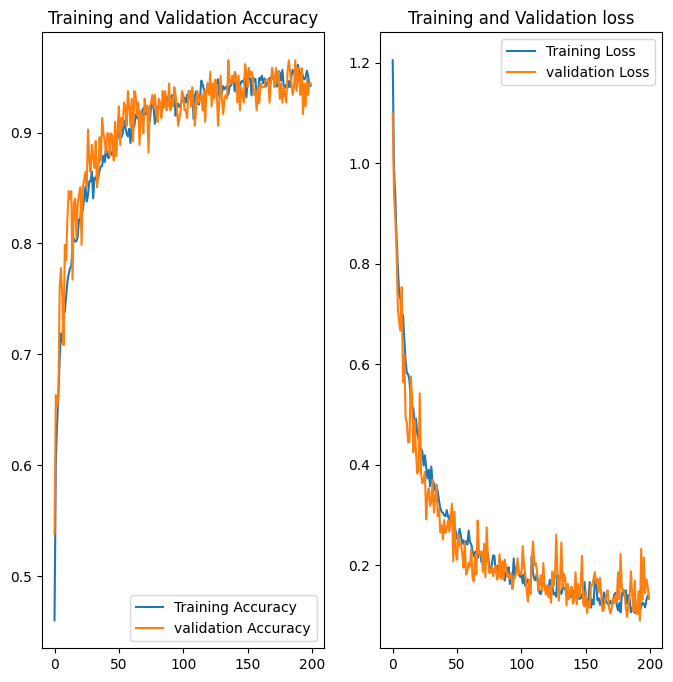

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label="validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label="Training Loss")
plt.plot(range(EPOCHS), val_loss, label="validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation loss")

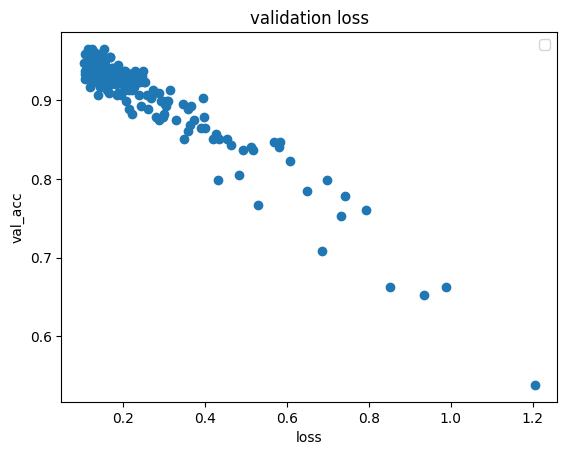

In [ ]:
plt.scatter(history.history['loss'],history.history['val_accuracy'])
plt.xlabel("loss")
plt.ylabel("val_acc")
plt.title("validation loss")
plt.legend()
plt.show()


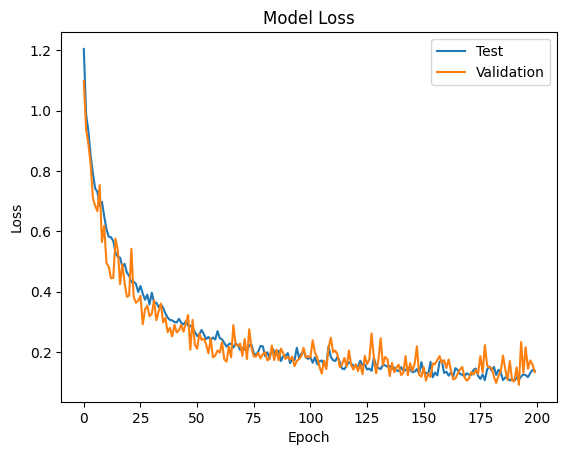

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [ ]:
np.argmax([9.2615408e-04, 9.9907386e-0, 1.4293106e-10, 5.1619140e-09])

1

## Prediction:

first image to predict
actual label: notumor
1/1 [==============================] - 0s 58ms/step
predicted label: notumor


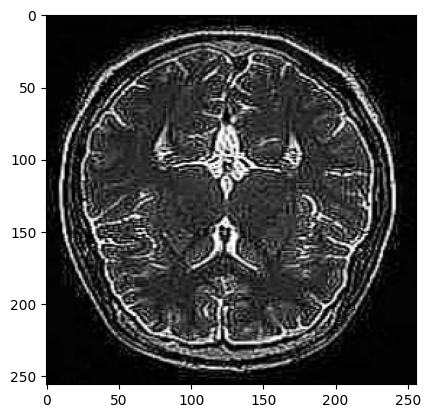

In [ ]:
for image_batch, label_batch in test_ds.take(1):

    first_image=image_batch[1].numpy().astype("uint8")
    first_label=label_batch[1].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_name[first_label])

    #Prediction:
    batch_prediction=model.predict(image_batch)
    #print((batch_prediction[0]))
    print("predicted label:", class_name[np.argmax(batch_prediction[1])])

In [ ]:
def predict(model, img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array, 0) #create a batch

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

## Actual label & Predicted label:

1/1 [==============================] - 0s 18ms/step


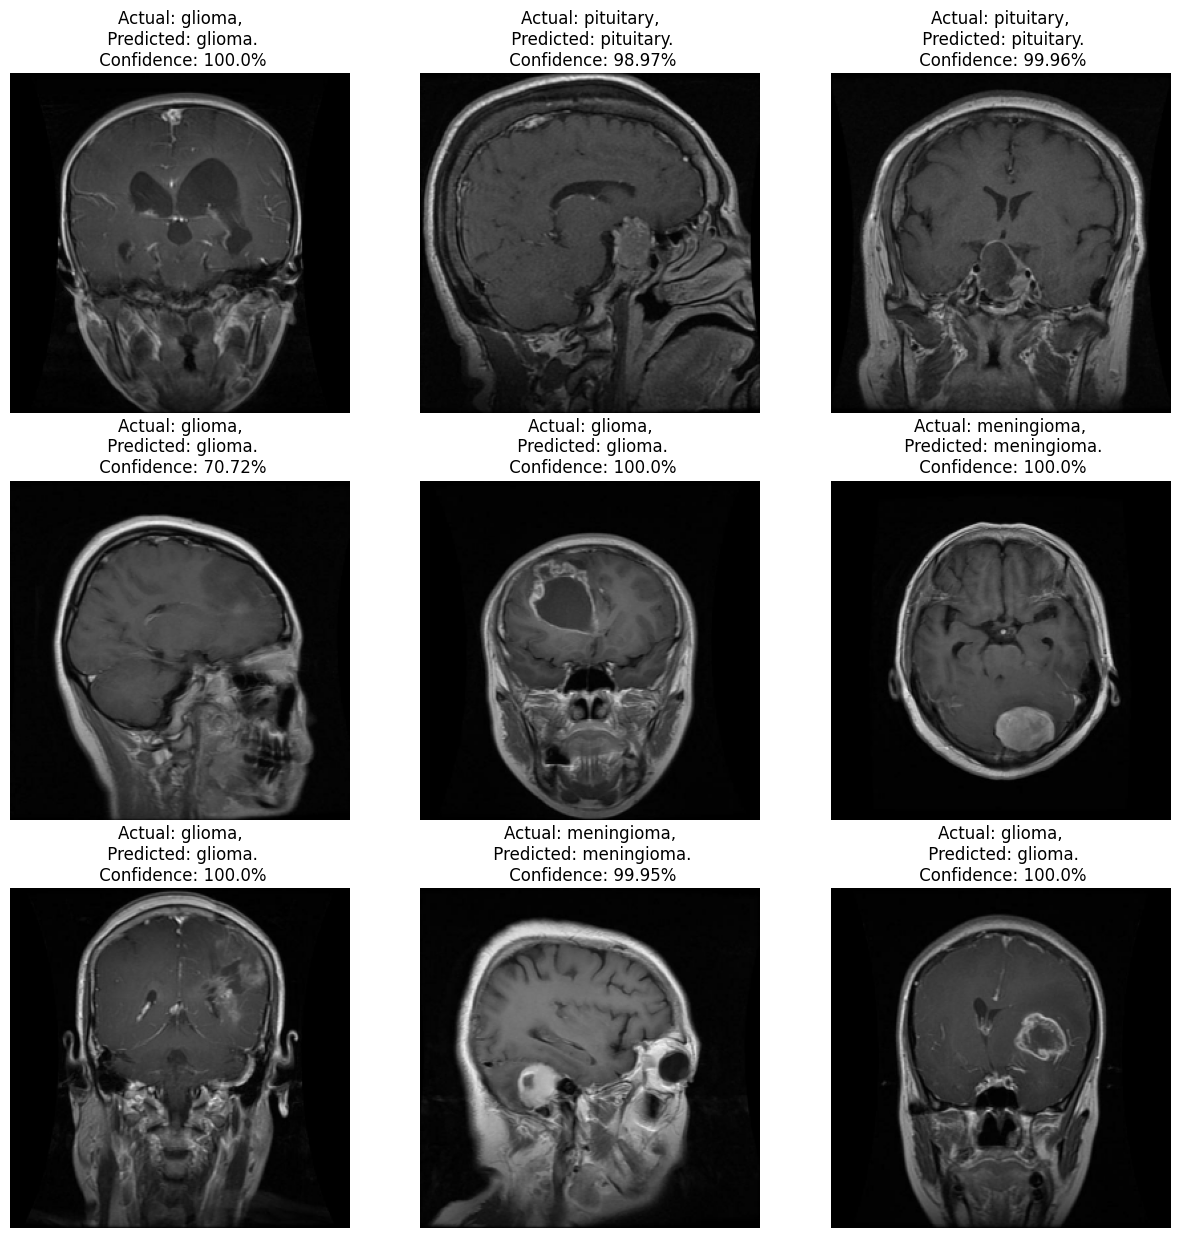

In [ ]:
plt.figure(figsize=(15,15))   #for increase dimenstion:
for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_name[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(test_ds,batch_prediction)